
\newpage

In [2]:
from utils.de         import DifferentialEvolution
from utils.eda        import CompactGA 
from utils.statistics import Statistics
from functions        import *

import matplotlib.pyplot as plt


# Resolução do Ítem (b)
## Gráfico da Função


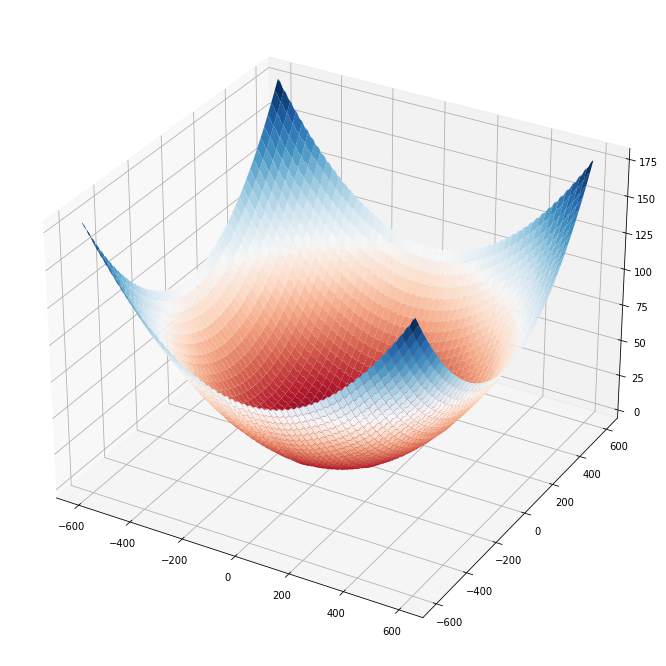

In [3]:
Griewank().graph()

### Evolução Diferencial

In [6]:
all_best_solutions = []
    
de = DifferentialEvolution(
    ng=50,
    np=100,
    cr=0.9, 
    f=0.8, 
    evfunc='Griewank', 
    algorithm='best_1_bin'
)
de.evolve()

all_best_solutions = de.get_all_best_solutions()


GERAÇÃO: 50

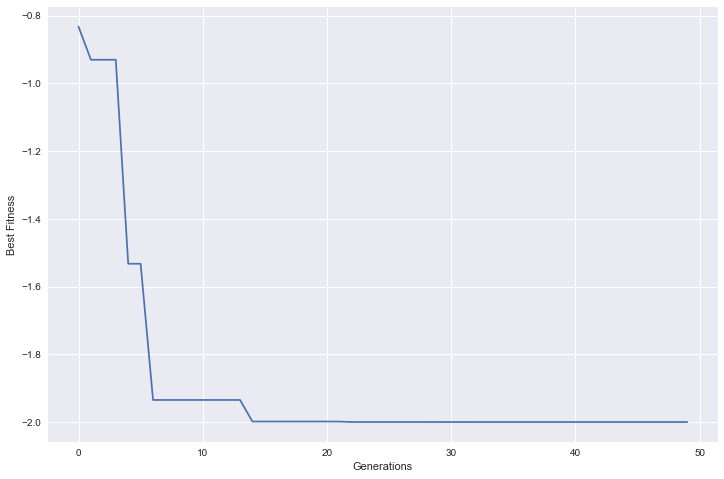

In [7]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [8]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: -1.9999999996193172	Q1: -1.9999994991546468	Q2: -1.999912099951725	Q3: -1.9348293834997758	Max: -1.9999999996193172
-1.8831117176941092


In [9]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    de = DifferentialEvolution(
        ng=50,
        np=100,
        cr=0.9, 
        f=0.8, 
        evfunc='Griewank', 
        algorithm='best_1_bin'
    )
    de.evolve()

    all_best_solutions.append(de.get_best_solution())
    all_execution_time.append(de.get_execution_time())


GERAÇÃO: 50

In [7]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 3.08557623895922e-11
Variance: 1.1538123805855226e-21
Standard Deviation: 3.3967813891764107e-11


In [8]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 1.9562207063039143
Variance: 0.0338642123460027
Standard Deviation: 0.1840223148044897


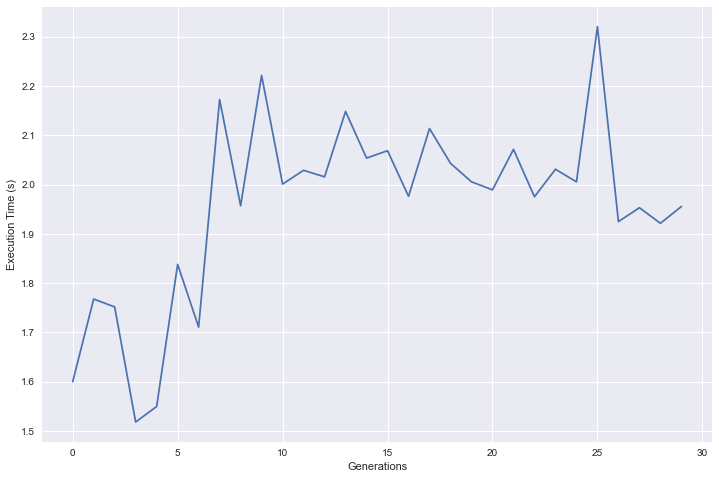

In [9]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()

### Algorítmos de Estimação de Distribuição

In [16]:
all_best_solutions = []
    
cga = CompactGA(
    ng=1100,
    np=150, 
    pmin=0.04, 
    pmax=0.93, 
    alpha=0.03, 
    nbits=5, 
    evfunc='Griewank'
)
cga.evolve()

all_best_solutions = de.get_all_best_solutions()

Generatin string populagion. 
GERAÇÃO: 1100

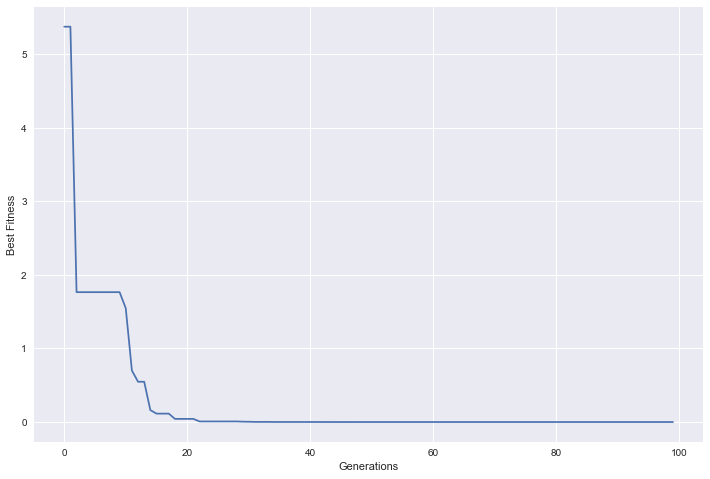

In [17]:
x, fitness = [], []
for i, s in enumerate(all_best_solutions):
    fitness.append(s.get_fit())
    x.append(i)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [18]:
statistics = Statistics(fitness)

min_, q1, q2, q3, max_ = statistics.quantile 
print('Min: {}\tQ1: {}\tQ2: {}\tQ3: {}\tMax: {}'.format(min_, q1, q2, q3, max_))
print(statistics.mean)


Min: 1.6148904435908662e-10	Q1: 3.9940303953045486e-08	Q2: 3.6114569939460495e-05	Q3: 0.008127944249185948	Max: 1.0843966613549586e-09
0.2897289160799225


In [19]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    
    cga = CompactGA(
        ng=1100,
        np=150, 
        pmin=0.04, 
        pmax=0.93, 
        alpha=0.03, 
        nbits=5, 
        evfunc='Griewank'
    )
    cga.evolve()

    all_best_solutions.append(de.get_best_solution())
    all_execution_time.append(de.get_execution_time())

Generatin string populagion. 
GERAÇÃO: 1100Generatin string populagion. 
GERAÇÃO: 1100Generatin string populagion. 
GERAÇÃO: 1100Generatin string populagion. 
GERAÇÃO: 1100Generatin string populagion. 
GERAÇÃO: 1100Generatin string populagion. 
GERAÇÃO: 1100Generatin string populagion. 
GERAÇÃO: 1100Generatin string populagion. 
GERAÇÃO: 1100Generatin string populagion. 
GERAÇÃO: 1100Generatin string populagion. 
GERAÇÃO: 1100Generatin string populagion. 
GERAÇÃO: 1100Generatin string populagion. 
GERAÇÃO: 385

In [ ]:
fitness = []
for i in all_best_solutions:
    fitness.append(i.get_fit())

statistics = Statistics(fitness)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

In [ ]:
statistics = Statistics(all_execution_time)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

In [ ]:
x, y = [], []

for i, v in enumerate(all_execution_time):
    x.append(i)
    y.append(v)

plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, y)
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()